In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow sklearn matplotlib pandas ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 7.0 MB/s 


In [27]:
import os, shutil
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model, image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, hamming_loss
import pandas as pd
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.8 ms (started: 2022-08-17 09:21:19 +00:00)


In [ ]:
!ls

drive  sample_data
time: 126 ms (started: 2022-08-12 01:19:33 +00:00)


In [ ]:
local_zip = 'drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp')
zip_ref.close()

In [ ]:
os.listdir('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/rockpaperscissors')

['paper', 'rock', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt']

time: 5.83 ms (started: 2022-08-12 01:24:15 +00:00)


In [ ]:
os.remove('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/rockpaperscissors/README_rpc-cv-images.txt')

In [ ]:
shutil.rmtree('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/rockpaperscissors/rps-cv-images')

time: 6.55 s (started: 2022-08-13 03:57:10 +00:00)


In [ ]:
os.listdir('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/rockpaperscissors')

['paper', 'rock', 'scissors']

time: 3.51 ms (started: 2022-08-13 03:57:20 +00:00)


In [4]:
src_dir = 'drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/rockpaperscissors'
src_rock_dir = os.path.join(src_dir, 'rock')
src_paper_dir = os.path.join(src_dir, 'paper')
src_scissors_dir = os.path.join(src_dir, 'scissors')

time: 1.02 ms (started: 2022-08-17 08:08:40 +00:00)


In [5]:
base_dir = 'drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'val')

# train
train_rock_dir = os.path.join(train_dir, 'rock') # rock
train_paper_dir = os.path.join(train_dir, 'paper') # paper
train_scissors_dir = os.path.join(train_dir, 'scissors') # scissors

# validation
valid_rock_dir = os.path.join(valid_dir, 'rock') # rock
valid_paper_dir = os.path.join(valid_dir, 'paper') # paper
valid_scissors_dir = os.path.join(valid_dir, 'scissors') # scissors

time: 1.33 ms (started: 2022-08-17 08:08:53 +00:00)


In [ ]:
# Make directories
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(valid_dir)

os.mkdir(train_rock_dir)
os.mkdir(train_paper_dir)
os.mkdir(train_scissors_dir)

os.mkdir(valid_rock_dir)
os.mkdir(valid_paper_dir)
os.mkdir(valid_scissors_dir)

time: 22.8 ms (started: 2022-08-13 03:04:53 +00:00)


In [10]:
# Setting
## Train Augmentation
aug_set = ImageDataGenerator(
    rotation_range=15,
    zoom_range=[0.5, 1.5],
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    validation_split=0.4
)
## Validation Augmentation
#valid_aug = ImageDataGenerator(rescale=1./255)

time: 1.22 ms (started: 2022-08-17 08:24:15 +00:00)


In [13]:
train_gen = aug_set.flow_from_directory(
    src_dir,
    target_size=(200, 300),
    color_mode='rgb',
    classes=['rock', 'paper', 'scissors'],
    class_mode='categorical',
    batch_size=16,
    subset='training',
    interpolation='nearest'
)

valid_gen = aug_set.flow_from_directory(
    src_dir,
    target_size=(200, 300),
    color_mode='rgb',
    classes=['rock', 'paper', 'scissors'],
    class_mode='categorical',
    batch_size=16,
    subset='validation',
    interpolation='nearest'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
time: 215 ms (started: 2022-08-17 08:29:45 +00:00)


In [17]:
model_rps_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

time: 3.67 s (started: 2022-08-17 08:39:30 +00:00)


In [19]:
model_rps_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 147, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 35, 128)      0

In [20]:
model_rps_1.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['categorical_accuracy']
)

time: 12.4 ms (started: 2022-08-17 08:43:05 +00:00)


In [25]:
os.mkdir('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint')

time: 3.64 ms (started: 2022-08-17 08:55:05 +00:00)


In [23]:
mcp_path_1 = os.path.join("drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e{epoch:04d}_val{val_categorical_accuracy:.3f}.h5")

mcp_val_acc_1 = ModelCheckpoint(
    filepath = mcp_path_1,
    monitor="val_categorical_accuracy",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode="max",
    save_freq="epoch"
)

time: 1.16 ms (started: 2022-08-17 08:49:55 +00:00)


In [26]:
history_1 = model_rps_1.fit(
      train_gen,
      steps_per_epoch=25,
      epochs=25,
      validation_data=valid_gen,
      validation_steps=5,
      verbose=2,
      callbacks=[mcp_val_acc_1]
)

Epoch 1/25

Epoch 1: val_categorical_accuracy improved from 0.40000 to 0.46250, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0001_val0.463.h5
25/25 - 120s - loss: 1.0438 - categorical_accuracy: 0.5155 - val_loss: 1.0181 - val_categorical_accuracy: 0.4625 - 120s/epoch - 5s/step
Epoch 2/25

Epoch 2: val_categorical_accuracy improved from 0.46250 to 0.61250, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0002_val0.613.h5
25/25 - 94s - loss: 0.9621 - categorical_accuracy: 0.5225 - val_loss: 0.9243 - val_categorical_accuracy: 0.6125 - 94s/epoch - 4s/step
Epoch 3/25

Epoch 3: val_categorical_accuracy improved from 0.61250 to 0.78750, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0003_val0.788.h5
25/25 - 70s - loss: 0.7762 - categorical_accuracy: 0.6762 - val_loss: 0.6413 - val_categorical_accuracy: 0.7875 - 70s/epoch - 3s/s

In [42]:
model_rps_1.load_weights('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0021_val0.938.h5')

time: 364 ms (started: 2022-08-17 10:13:57 +00:00)


In [36]:
print(train_gen.class_indices)

{'rock': 0, 'paper': 1, 'scissors': 2}
time: 828 µs (started: 2022-08-17 09:43:47 +00:00)


Saving paper2.jpg to paper2 (3).jpg
paper2.jpg
[[0.0000000e+00 2.8089555e-25 1.0000000e+00]]
2
scissors


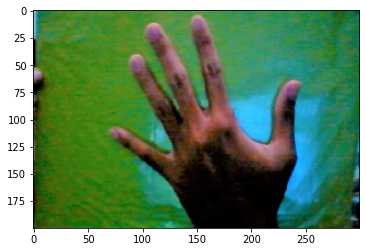

time: 13.7 s (started: 2022-08-17 11:18:32 +00:00)


In [60]:
# Selalu Rock [0 1 0]
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(200,300))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model_rps_1.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  print(classes)
  print(output_class)
  if output_class==0:
    print('rock')
  elif output_class==1:
    print('paper')
  else:
    print('scissors')

In [44]:
model_rps_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

time: 70.2 ms (started: 2022-08-17 10:17:23 +00:00)


In [45]:
model_rps_2.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['categorical_accuracy']
)

time: 8.35 ms (started: 2022-08-17 10:18:02 +00:00)


In [56]:
model_rps_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 298, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 149, 32)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 147, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 71, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 35, 128)     

In [48]:
mcp_path_2 = os.path.join("drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e{epoch:04d}_val{val_categorical_accuracy:.3f}.h5")

mcp_val_loss_2 = ModelCheckpoint(
    filepath = mcp_path_2,
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    save_freq="epoch"
)

time: 994 µs (started: 2022-08-17 10:19:50 +00:00)


In [49]:
history_2 = model_rps_2.fit(
      train_gen,
      epochs=50,
      validation_data=valid_gen,
      verbose=2,
      callbacks=[mcp_val_loss_2]
)

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.55437, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0001_val0.795.h5
83/83 - 46s - loss: 0.9899 - categorical_accuracy: 0.4992 - val_loss: 0.5544 - val_categorical_accuracy: 0.7952 - 46s/epoch - 551ms/step
Epoch 2/50

Epoch 2: val_loss improved from 0.55437 to 0.45773, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0002_val0.815.h5
83/83 - 34s - loss: 0.5733 - categorical_accuracy: 0.7709 - val_loss: 0.4577 - val_categorical_accuracy: 0.8146 - 34s/epoch - 413ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 0.45773
83/83 - 35s - loss: 0.4256 - categorical_accuracy: 0.8356 - val_loss: 0.5243 - val_categorical_accuracy: 0.7872 - 35s/epoch - 419ms/step
Epoch 4/50

Epoch 4: val_loss improved from 0.45773 to 0.30512, saving model to drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_

In [50]:
model_rps_2.load_weights('drive/MyDrive/dicodingMachineLearning/projectAkhirMLPemula/tmp/checkPoint/model_rps_1_e0043_val0.982.h5')

time: 1.09 s (started: 2022-08-17 10:51:42 +00:00)


Saving rock2.jpg to rock2 (3).jpg
rock2.jpg
[[0. 1. 0.]]
paper


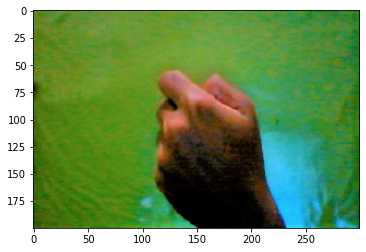

time: 18.5 s (started: 2022-08-17 11:21:33 +00:00)


In [64]:

uploaded_2 = files.upload()

for fn_2 in uploaded_2.keys():
  path_2 = fn_2
  img_2 = image.load_img(path_2, target_size=(200,300))

  imgplot_2 = plt.imshow(img_2)
  x_2 = image.img_to_array(img_2)
  x_2 = np.expand_dims(x_2, axis=0)
  images_2 = np.vstack([x_2])

  classes_2 = model_rps_2.predict(images_2, batch_size=10)
  output_class_2 = np.argmax(classes_2)
  print(fn_2)
  print(classes_2)
  if output_class_2==0:
    print('rock')
  elif output_class_2==1:
    print('paper')
  else:
    print('scissors')

In [65]:
# Data Diri

## Nama: Ichsan Arsyi Putra
## Email: ichsan.x.an@outlook.co.id
## Bergabung sejak 11 Apr 2021
## Asal: Kabupaten Semarang, Jawa Tengah

time: 458 µs (started: 2022-08-17 11:32:23 +00:00)
